<a href="https://colab.research.google.com/github/ChristyUncle/Machine_learning_Assignment1/blob/main/ML4F_2023_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 -- ML4F 2023

## Instructions
* This assignment covers the material discussed in Lectures ML1 - ML4.
* Each group submits _only one_ notebook via canvas on the assignment page.
* The notebook should be named `assignment1_groupXX.ipynb` where `XX` is your group number,  
e.g. for group 3 this will be `assignment1_group03.ipynb`.
* The notebook should run without raising any errors.
* We recommend keeping the folder structure
```
assignment/
    data/
    lib/
    assignment1_groupXX.ipynb
```
* We strongly recommend git, as you are encouraged to collaborate and split up the work and maybe even start independently. To see how to set up your own repo for your group, see `VU Workshop Introduction to Version Control with GIT.pptx` discussed in week 2.
* Do not spend time on optimizing the speed of your code. However, if it runs for more than 5 minutes, we will terminate it.
* We strongly encourage you to experiment, try different approaches and combinations and get to know the problem from alternative angles. But the final notebook should only contain the necessary results for grading.
----

<div style="font-size:24px; text-align:center; font-weight:bold">Good luck!</div>

----

# Assignment 1 - Features & Algorithms

Kiwibank, a commercial bank from New Zealand, is interested in updating their loan default prediction algorithm. They used to check each client manually, and now they want to use Machine Learning to predict who will default on their loan and pose a threat to the bank's balance sheet. They have supplied you with a dataset of their past clients, and they've asked you to consult them on their adaptation of Machine Learning in this process.

First take a look at the data, then test different algorithms, select key features and write a recommendation to the bank.

State your imports below.

In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils.validation import column_or_1d
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [5]:
data = pd.read_csv("/content/7_ML4F_Assignment1Data.csv")

In [6]:
data.head()

,Unnamed: 0,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,0,2814126,8220,7541,16677.310300,58,BAT2252229,11.093450,C,B3,...,8.681568,0.923242,0,INDIVIDUAL,74,0,24,486498,63090,0
1,1,60461819,5806,10460,26921.459530,36,BAT224923,7.167189,A,B5,...,0.538751,1.279298,0,INDIVIDUAL,72,0,30,199804,35652,0
2,2,30315706,15244,31724,13800.306530,59,BAT2833642,16.125747,D,E3,...,1.072393,0.997230,0,INDIVIDUAL,13,0,30,33352,4585,0
3,3,35094493,7684,8893,12163.798130,59,BAT1467036,12.627483,E,C1,...,6.759186,0.903630,0,INDIVIDUAL,92,0,28,30568,7749,0
4,4,2803253,13333,8238,5709.237854,59,BAT4271519,13.345461,A,C3,...,4.335110,0.784438,0,INDIVIDUAL,4,0,30,292225,27098,0


In [7]:
data.dtypes

Unnamed: 0                        int64
ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64


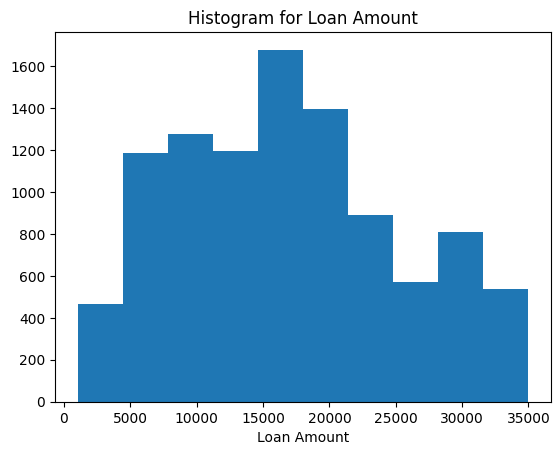

In [12]:
plt.hist(data["Loan Amount"])
plt.xlabel("Loan Amount")
plt.title("Histogram for Loan Amount")
plt.show()

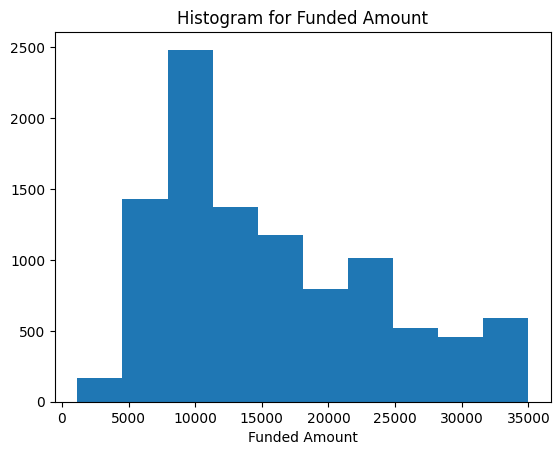

In [14]:
plt.hist(data["Funded Amount"])
plt.xlabel("Funded Amount")
plt.title("Histogram for Funded Amount")
plt.show()

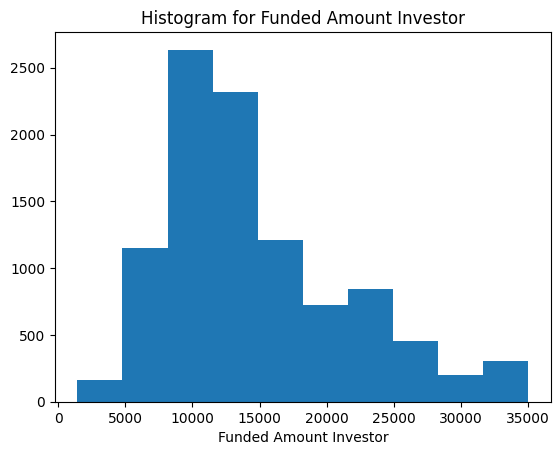

In [15]:
plt.hist(data["Funded Amount Investor"])
plt.xlabel("Funded Amount Investor")
plt.title("Histogram for Funded Amount Investor")
plt.show()

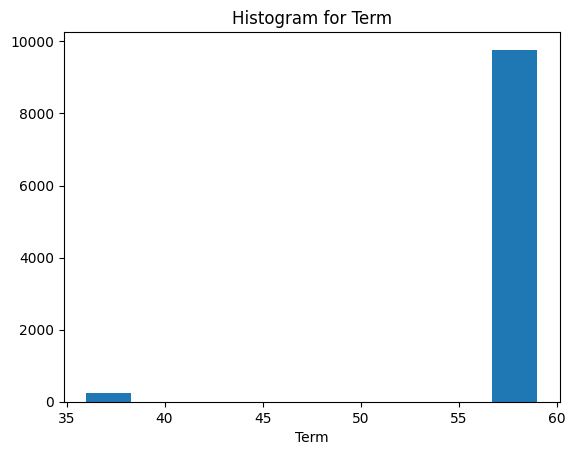

In [27]:
plt.hist(data["Term"])
plt.xlabel("Term")
plt.title("Histogram for Term")
plt.show()

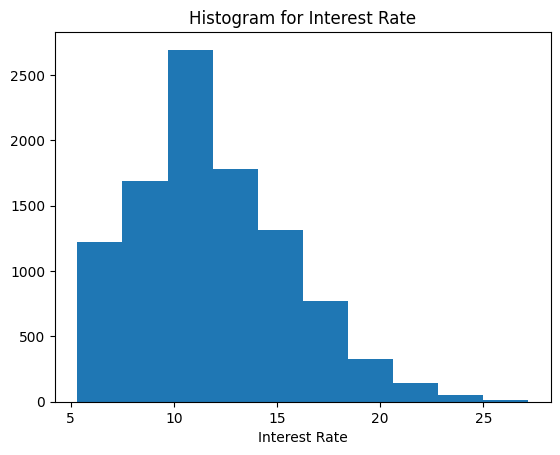

In [21]:
plt.hist(data["Interest Rate"])
plt.xlabel("Interest Rate")
plt.title("Histogram for Interest Rate")
plt.show()

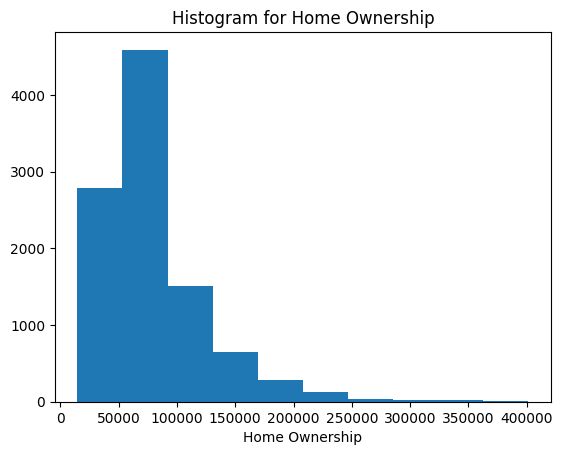

In [22]:
plt.hist(data["Home Ownership"])
plt.xlabel("Home Ownership")
plt.title("Histogram for Home Ownership")
plt.show()

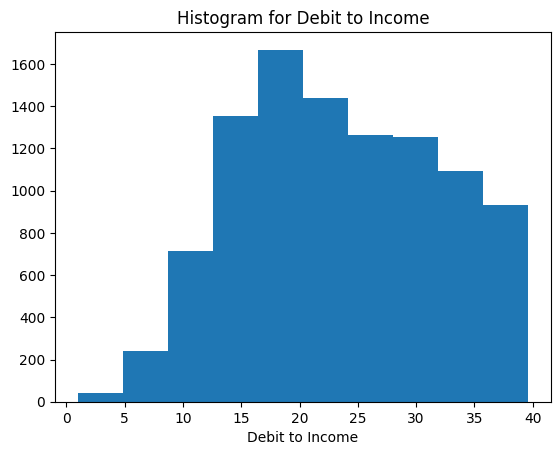

In [23]:
plt.hist(data["Debit to Income"])
plt.xlabel("Debit to Income")
plt.title("Histogram for Debit to Income")
plt.show()

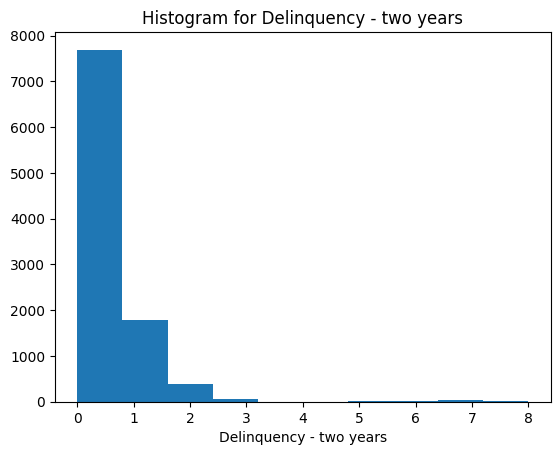

In [24]:
plt.hist(data["Delinquency - two years"])
plt.xlabel("Delinquency - two years")
plt.title("Histogram for Delinquency - two years")
plt.show()

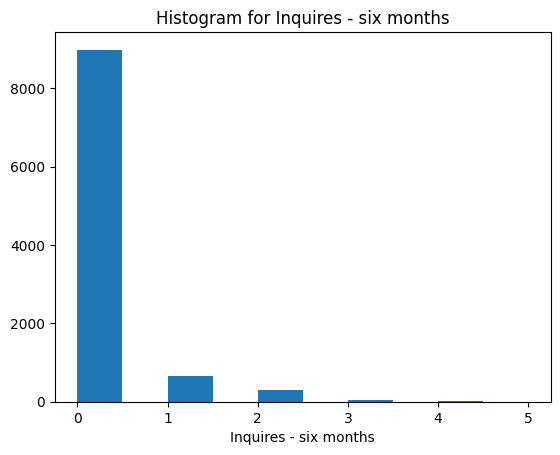

In [29]:
plt.hist(data["Inquires - six months"])
plt.xlabel("Inquires - six months")
plt.title("Histogram for Inquires - six months")
plt.show()

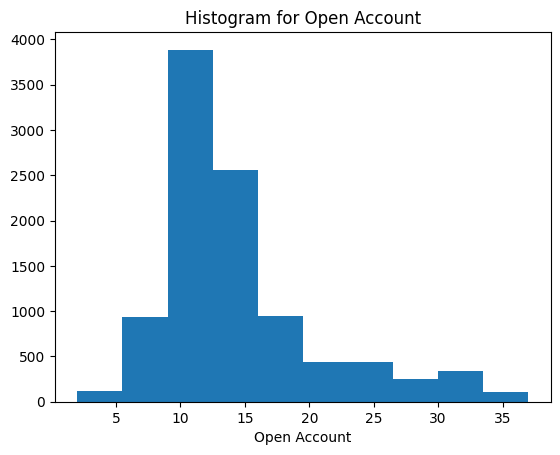

In [31]:
plt.hist(data["Open Account"])
plt.xlabel("Open Account")
plt.title("Histogram for Open Account")
plt.show()

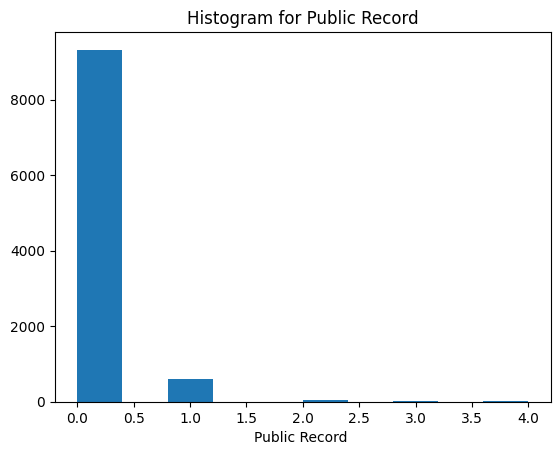

In [33]:
plt.hist(data["Public Record"])
plt.xlabel("Public Record ")
plt.title("Histogram for Public Record")
plt.show()

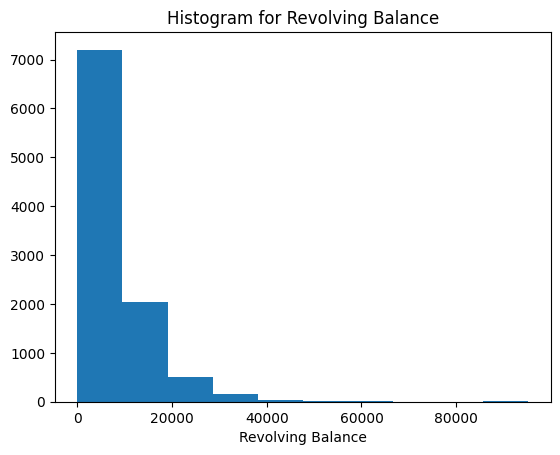

In [34]:
plt.hist(data["Revolving Balance"])
plt.xlabel("Revolving Balance")
plt.title("Histogram for Revolving Balance")
plt.show()

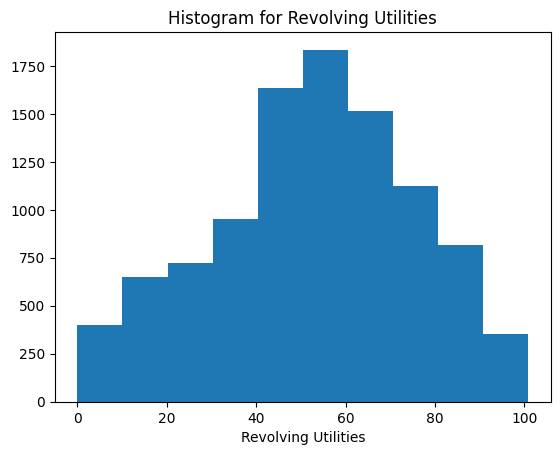

In [35]:
plt.hist(data["Revolving Utilities"])
plt.xlabel("Revolving Utilities")
plt.title("Histogram for Revolving Utilities")
plt.show()

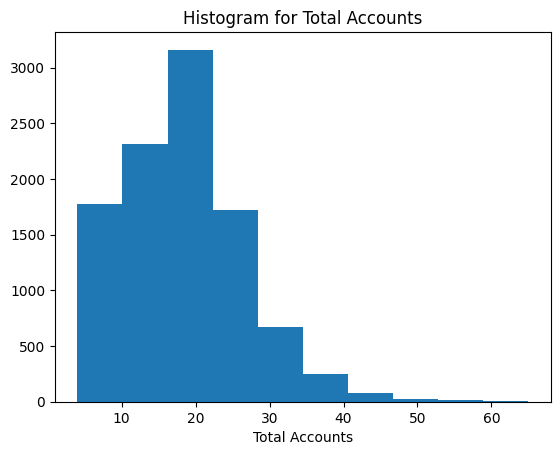

In [37]:
plt.hist(data["Total Accounts"])
plt.xlabel("Total Accounts")
plt.title("Histogram for Total Accounts")
plt.show()

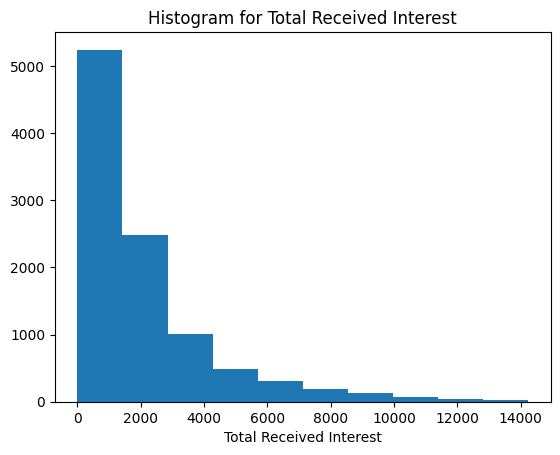

In [38]:
plt.hist(data["Total Received Interest"])
plt.xlabel("Total Received Interest")
plt.title("Histogram for Total Received Interest")
plt.show()

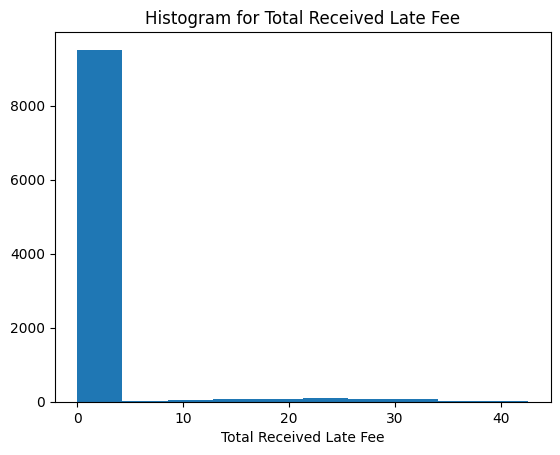

In [39]:
plt.hist(data["Total Received Late Fee"])
plt.xlabel("Total Received Late Fee")
plt.title("Histogram for Total Received Late Fee")
plt.show()

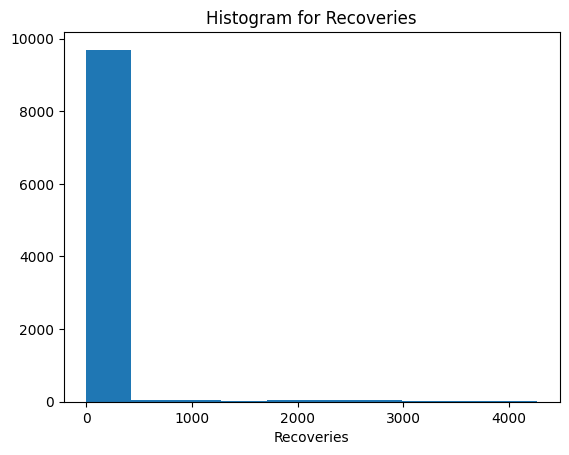

In [40]:
plt.hist(data["Recoveries"])
plt.xlabel("Recoveries")
plt.title("Histogram for Recoveries")
plt.show()

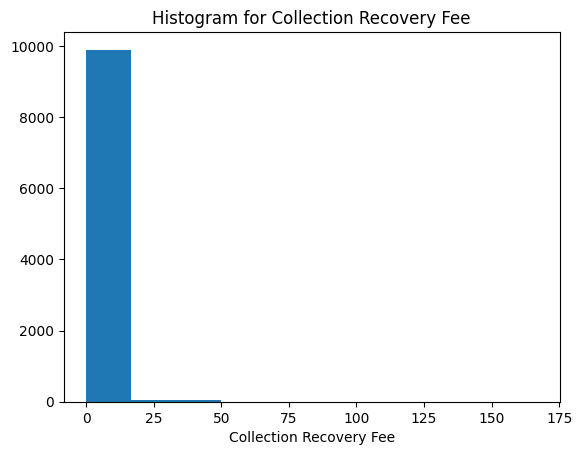

In [41]:
plt.hist(data["Collection Recovery Fee"])
plt.xlabel("Collection Recovery Fee")
plt.title("Histogram for Collection Recovery Fee")
plt.show()

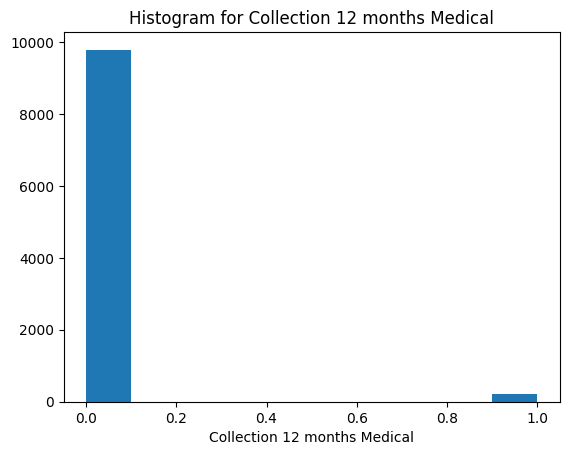

In [42]:
plt.hist(data["Collection 12 months Medical"])
plt.xlabel("Collection 12 months Medical")
plt.title("Histogram for Collection 12 months Medical")
plt.show()

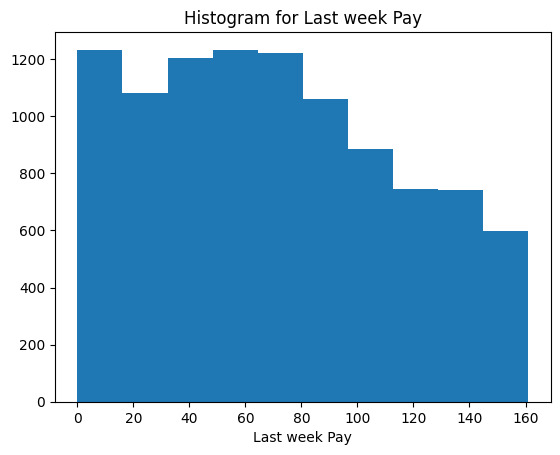

In [43]:
plt.hist(data["Last week Pay"])
plt.xlabel("Last week Pay")
plt.title("Histogram for Last week Pay")
plt.show()

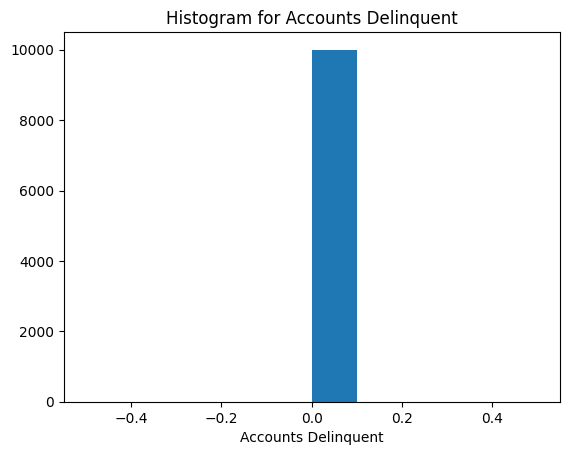

In [44]:
plt.hist(data["Accounts Delinquent"])
plt.xlabel("Accounts Delinquent")
plt.title("Histogram for Accounts Delinquent")
plt.show()

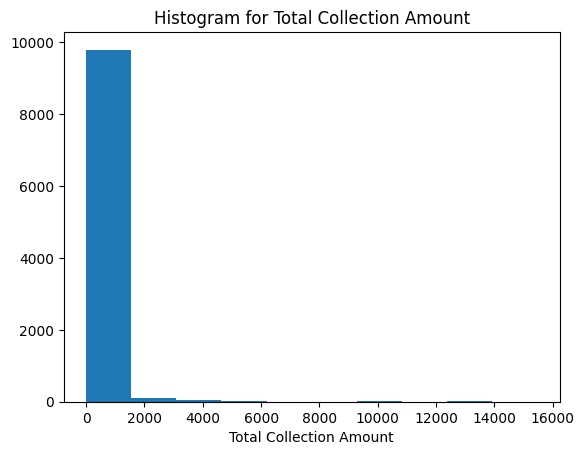

In [45]:
plt.hist(data["Total Collection Amount"])
plt.xlabel("Total Collection Amount")
plt.title("Histogram for Total Collection Amount")
plt.show()

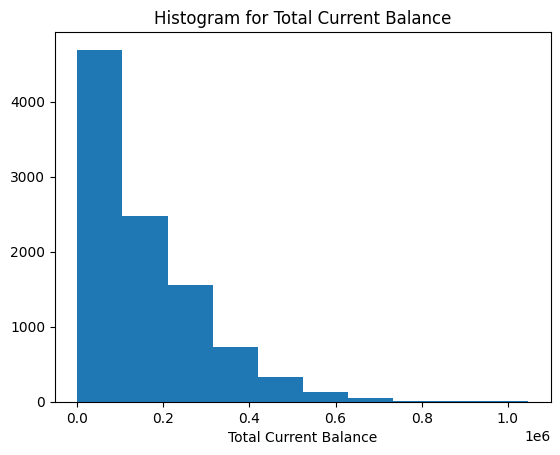

In [47]:
plt.hist(data["Total Current Balance"])
plt.xlabel("Total Current Balance")
plt.title("Histogram for Total Current Balance")
plt.show()

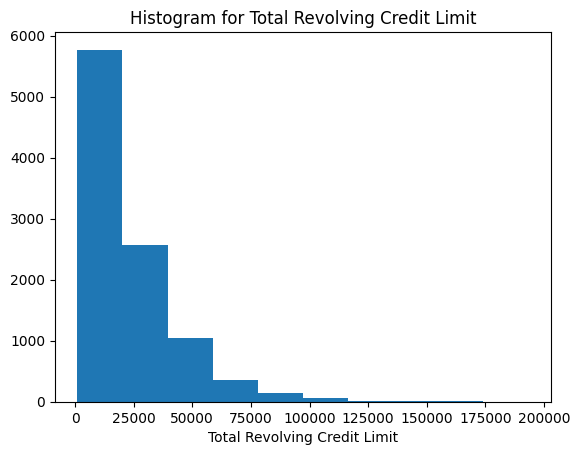

In [48]:
plt.hist(data["Total Revolving Credit Limit"])
plt.xlabel("Total Revolving Credit Limit")
plt.title("Histogram for Total Revolving Credit Limit")
plt.show()

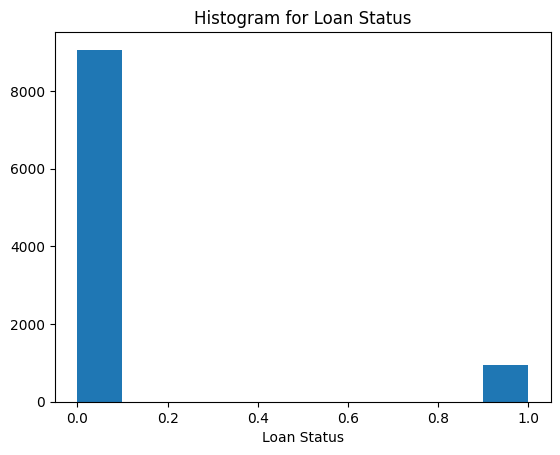

In [49]:
plt.hist(data["Loan Status"])
plt.xlabel("Loan Status")
plt.title("Histogram for Loan Status")
plt.show()

# Preprocessing (15 points)
*5 points for correct code*

*10 points for normalization procedure*

The data consists of 34 features and one target variable, 'Loan Status'
We have 25 numerical features and 9 categorical features. For the numerical features, apply a technique
to make the data more normal. This can be Standardization, Normalization, log or a Box-Cox transformation.
Explain why you might use one method for some features, and another for other features.
Also check for missing values and uninformative features (NO FEATURE SELECTION YET).

# Training (30 points)
*10 points for correct code*

*10 points for interpretation results*

*10 points for pitfalls*

We've familiarized ourselves with the data, so now we're going to train some models.
A handful of frequently used models are: Decision Trees (DTC), Nearest Neighbors (KNN) and
Stochastic Gradient Descent learning algorithm (SGD).
Split the data into a training set and a test set, and train all mentioned models on the data.
For KNN, find the optimal number of neighbors.
Use the test set to get the predicted values. Show the performance of the different models in a Confusion Matrix and compare the accuracy, precision, recall and F1-score.

When looking at the resulting measures and matrices, what stands out? What possible pitfalls may be hiding in each of the models?

# Feature Selection (35 points)
*10 points for correct code*

*15 points for correct reasoning and interpretation*

*10 points for explanation pitfalls*

Now that we've compared the performance of the different models, we place our judgement upon
the dimensionality of the data. The dimension reduction methods discussed so far are
L2 regularization and LASSO. Combining these methods gives us the Elastic Net method. What are some pitfalls of L2 regularization and of LASSO? How does Elastic Net overcome these pitfalls?

The Elastic Net method uses two parameters, l1_ratio and α. l1_ratio takes on a value between 0 and 1, and α a value higher than 0. Use the Elastic Net method to get an impression of the importance of the features, and make
an appropriate and argumented decision regarding their individual inclusion.

# Recommendation (10 points)
*10 points for paper*

Now that you've made an assessment of the key features and it is clear which model performs best, it is time to write a recommendation to Kiwibank. Explain what you have researched and present your results in a short paper in no more than 400 words.

Focus on the bank's wants and needs, and minimize the technical talk. We recommend writing in LaTeX/Overleaf, but Word or another application is also fine. Hand the paper in as PDF, together with your Jupyter Notebook, in a ZIP-file.